In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#mnist=input_data.read_data_sets("MNIST_data/")
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist   # HAS 70,000 IMAGES !!!!

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x181a492278>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c2241c4e0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c2241c588>)

In [5]:
mnist.train.images.shape   # 28*28 ,FLATTENED 55000 images

(55000, 784)

In [6]:
mnist.test.images.shape 

(10000, 784)

In [7]:
mnist.validation.images.shape 

(5000, 784)

In [8]:
mnist.train.labels, mnist.train.labels.shape#(55000,)    output is a 10 sized vector

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]), (55000, 10))

# in multiclassification problems we want our output to be onehot encoded,output layer has 10 units,only one of them 1 others 0

In [9]:
import numpy as np
from matplotlib import pyplot as plt

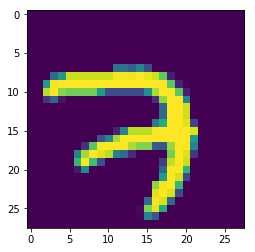

In [10]:
first_image=mnist.train.images[0]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))# from the flatenned image created an image
plt.imshow(first_image)
plt.show()

#  Creating your own NN with Tensorflow !!

#  each image is flatenned to 784 so our input layer has 784 entries
# we have 10 units in output layer -for classifying 1 out of 10 classes
# lets take 2 hidden units with 256 units (totally random)


# Lay 1 has 784*256 weights ans 1* 256 biases-which is initiali to ramdom values
# Lay 2 has 256*256 weights ans 1* 256 biases-which is initiali to ramdom values
# output has 256*10 weights and 1*10 biases-which is initiali to ramdom values


In [11]:
with tf.Session() as sess:
    print(tf.random_normal([784,256]).eval())

[[ 1.157357   -0.56403667 -1.05047    ... -1.2217664   0.8629345
  -0.43726406]
 [ 0.5229951  -0.28505456 -0.95764035 ... -1.1764257   1.2730539
   0.3383443 ]
 [ 2.4287863  -0.68671596 -2.164815   ... -1.1487008   0.61201537
   0.4100877 ]
 ...
 [ 1.3556172  -0.7056232   2.333279   ...  0.5281772  -0.3004942
  -0.75858915]
 [ 0.6162004  -0.2528405  -0.24191122 ...  0.06954598 -3.0614164
  -1.0921593 ]
 [-0.29123366 -0.7346627  -0.40572876 ...  0.60482204 -0.33599594
  -1.203188  ]]


In [12]:

# not place holders as the user doesnt provide it to us
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10
# both dictionaries
weights={
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),# randomly select values from a normal distribution
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}
biases={
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),# randomly select values from a normal distribution
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# to visualise fwd propog .the initial input is 10000*784 the first layer has weights 784*256 these are matrix multiplied and add biases to it. similarly pass to next layers

In [13]:
def forward_propogation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1) # activation fxn ,relu=max(a,0)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])# not using any activation here
    return output

In [14]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# predictions using random weights
x=tf.placeholder("float",[None,n_input])# we always know the second dimension ->784 (flatenned image)
# this x can sometimes be training data/testing data /validation, no of images may vary
y=tf.placeholder(tf.int32,[None,n_classes]) # for each img output is a 10 sized vector
# in above vector jahn pe 1 hai wo indedx answer hai
pred=forward_propogation(x,weights,biases)


In [15]:
predictions=tf.argmax(pred,1) # 1 is the axis we have to find max along each ROW
# arg max find the index wherre maximun happens
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)# . TAKES TESOR OBJECTS NOT ARRAYS 

In [16]:
predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([2, 6, 6, ..., 0, 2, 6]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False, False, False, ..., False, False,  True]))

In [17]:
correct_pred.sum()# out of 10,000-this is wid entirely random images

1054

# using the cross entropy cost -y(log(h))-(1-y)log(1-h)

In [18]:
#tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))#taking mean of all 10000 images

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# how to reduce this cost by changing weights ?-> .   USE OPTIMISER

In [19]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [20]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [21]:
for i in range(25):
    c,_=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
    print(c)    # LESSER COST EACH TIME WE RUN IT

1692.7025
1040.5156
784.7114
667.4742
501.5155
338.17798
243.80013
208.55066
199.40434
184.32558
160.3322
140.01862
125.872665
115.77623
108.40827
102.11004
95.745415
89.46034
83.88429
79.37198
75.90512
73.23335
71.072525
69.287674
67.49584


# Q:    how does this optimizer know what variables to change ??
## Sol:      by default all variables we create have a property trainable=True,
   ##         so our optimiser finds all variables with trainable=True(defalult true) , AND FIND GRADIENT WRT TO ALL OF THEM !(all that variables should depend on cost also)
   ##

In [22]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [23]:
predictions=tf.argmax(pred,1) # 1 is the axis we have to find max along each ROW
# arg max find the index wherre maximun happens
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)# . TAKES TESOR OBJECTS NOT ARRAYS 
predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})


In [24]:
correct_pred.sum()# out of 10,000-this is wid entirely random images

8546

# # .  Batch gradient Descent   Quick updates to weights with smaller batches 

In [25]:
batch_size=100
for i in range(25):# 25* 550 times                                         
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost=total_cost+c
    print(total_cost)

13857.49609157443
4050.6920037624423
2286.633392890817
1563.4951497696889
1236.3944485362565
1117.0365695098294
1044.3531660348863
886.5900344739587
861.0706519689703
673.2890078932943
639.5684163933498
518.8369679651886
478.5981503205443
477.8576926258073
377.27454022048516
412.824699025162
339.8830788304854
255.39123320969912
227.2581425698035
296.19091669179505
274.53088417631704
187.1688380367971
139.1691335565747
146.21403339004996
184.7215583707291


In [26]:
predictions=tf.argmax(pred,1) # 1 is the axis we have to find max along each ROW
# arg max find the index wherre maximun happens
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)# . TAKES TESOR OBJECTS NOT ARRAYS 
predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})


In [27]:
correct_pred.sum()# out of 10,000-this is wid entirely random images

9489